# Exploratory Data Analysis (EDA)
Conduct EDA on the pollution aqi of all US counties and their socio-economic features to examine relationships between variables and other patterns in the data

Clean Data is used from data_wrangling11

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib
import plotly.figure_factory as ff
from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')


## Load data

In [18]:
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

In [2]:
# all aqi dataset for counties not averaged
daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv', encoding='latin-1')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

# NE us counties for all aqi avg
ne_df_2017 = r'../../data/processed/alt_full_dem_df_2017'
ne_df_2017 = pd.read_csv(ne_df_2017)
ne_df_2018 = r'../../data/processed/alt_full_dem_df_2018'
ne_df_2018 = pd.read_csv(ne_df_2018)
ne_df_2019 = r'../../data/processed/alt_full_dem_df_2019'
ne_df_2019 = pd.read_csv(ne_df_2019)

# all us counties for all aqi avg
all_df_17 = r'../../data/processed/all_df_2017'
all_df_2017 = pd.read_csv(all_df_17)
all_df_18 = r'../../data/processed/all_df_2018'
all_df_2018 = pd.read_csv(all_df_18)
all_df_19 = r'../../data/processed/all_df_2019'
all_df_2019 = pd.read_csv(all_df_19)

# all us counties for oznone aqi
ozone_df_17 = r'../../data/processed/all_ozone_df_2017'
ozone_df_18 = r'../../data/processed/all_ozone_df_2018'
ozone_df_19 = r'../../data/processed/all_ozone_df_2019'
ozone_df_2017 = pd.read_csv(ozone_df_17)
ozone_df_2018 = pd.read_csv(ozone_df_18)
ozone_df_2019 = pd.read_csv(ozone_df_19)

# all us counties for pm2.5 aqi
pm2_5_df_17 = r'../../data/processed/all_pm2_5_df_2017'
pm2_5_df_18 = r'../../data/processed/all_pm2_5_df_2018'
pm2_5_df_19 = r'../../data/processed/all_pm2_5_df_2019'
pm2_5_df_2017 = pd.read_csv(pm2_5_df_17)
pm2_5_df_2018 = pd.read_csv(pm2_5_df_18)
pm2_5_df_2019 = pd.read_csv(pm2_5_df_19)

# all us counties for so2 aqi
so2_df_17 = r'../../data/processed/all_so2_df_2017'
so2_df_18 = r'../../data/processed/all_so2_df_2018'
so2_df_19 = r'../../data/processed/all_so2_df_2019'
so2_df_2017 = pd.read_csv(so2_df_17)
so2_df_2018 = pd.read_csv(so2_df_18)
so2_df_2019 = pd.read_csv(so2_df_19)

# all us counties for pm10 aqi
pm10_df_17 = r'../../data/processed/all_pm10_df_2017'
pm10_df_18 = r'../../data/processed/all_pm10_df_2018'
pm10_df_19 = r'../../data/processed/all_pm10_df_2019'
pm10_df_2017 = pd.read_csv(pm10_df_17)
pm10_df_2018 = pd.read_csv(pm10_df_18)
pm10_df_2019 = pd.read_csv(pm10_df_19)

# all us counties for no2 aqi
no2_df_17 = r'../../data/processed/all_no2_df_2017'
no2_df_18 = r'../../data/processed/all_no2_df_2018'
no2_df_19 = r'../../data/processed/all_no2_df_2019'
no2_df_2017 = pd.read_csv(no2_df_17)
no2_df_2018 = pd.read_csv(no2_df_18)
no2_df_2019 = pd.read_csv(no2_df_19)

# all us counties for co aqi
co_df_17 = r'../../data/processed/all_co_df_2017'
co_df_18 = r'../../data/processed/all_co_df_2018'
co_df_19 = r'../../data/processed/all_co_df_2019'
co_df_2017 = pd.read_csv(co_df_17)
co_df_2018 = pd.read_csv(co_df_18)
co_df_2019 = pd.read_csv(co_df_19)

# NE counties with averaged all aqi

In [3]:
display(ne_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(ne_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(ne_df_2019.corr()['AQI_2019'].sort_values().tail(15))

HNAC_FEMALE_ratio_2017     0.190756
HNA_FEMALE_ratio_2017      0.191780
Unemployed_2017            0.196824
TOT_FEMALE_ratio_2017      0.202237
VEHICLE_TOT_2017           0.209205
HS_TOT_2017                0.211536
NHBA_MALE_ratio_2017       0.262107
BA_MALE_ratio_2017         0.264864
NHBAC_MALE_ratio_2017      0.265391
BAC_MALE_ratio_2017        0.269597
NHBA_FEMALE_ratio_2017     0.279015
BA_FEMALE_ratio_2017       0.280889
NHBAC_FEMALE_ratio_2017    0.282360
BAC_FEMALE_ratio_2017      0.285069
AQI_2017                   1.000000
Name: AQI_2017, dtype: float64

COL_OR_ASSOC_TOT_2018      0.288882
NHBA_MALE_ratio_2018       0.291288
NHBAC_MALE_ratio_2018      0.292866
HNAC_FEMALE_ratio_2018     0.295672
Unemployed_2018            0.298367
HNA_FEMALE_ratio_2018      0.299640
TOT_FEMALE_ratio_2018      0.303310
BA_MALE_ratio_2018         0.306014
BAC_MALE_ratio_2018        0.311454
NHBA_FEMALE_ratio_2018     0.325695
NHBAC_FEMALE_ratio_2018    0.327626
VEHICLE_TOT_2018           0.331917
BA_FEMALE_ratio_2018       0.337740
BAC_FEMALE_ratio_2018      0.342563
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

Unemployed_2019            0.255524
HS_TOT_2019                0.257668
NHBA_MALE_ratio_2019       0.258102
NHBAC_MALE_ratio_2019      0.259097
HNAC_FEMALE_ratio_2019     0.259517
BA_MALE_ratio_2019         0.269263
BAC_MALE_ratio_2019        0.273125
HNA_FEMALE_ratio_2019      0.275369
TOT_FEMALE_ratio_2019      0.292989
NHBA_FEMALE_ratio_2019     0.299474
NHBAC_FEMALE_ratio_2019    0.300548
VEHICLE_TOT_2019           0.306044
BA_FEMALE_ratio_2019       0.306999
BAC_FEMALE_ratio_2019      0.310091
AQI_2019                   1.000000
Name: AQI_2019, dtype: float64

In [4]:
display(ne_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(ne_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(ne_df_2019.corr()['AQI_2019'].sort_values().head(15))

NHIA_MALE_ratio_2017          -0.265631
NHIAC_MALE_ratio_2017         -0.263452
WAC_MALE_ratio_2017           -0.246982
COL_OR_ASSOC_TOT_ratio_2017   -0.246733
WA_MALE_ratio_2017            -0.245653
NHIA_FEMALE_ratio_2017        -0.243418
NHWAC_MALE_ratio_2017         -0.236416
NHWA_MALE_ratio_2017          -0.235914
WAC_FEMALE_ratio_2017         -0.231606
WA_FEMALE_ratio_2017          -0.231418
NHWA_FEMALE_ratio_2017        -0.228091
NHWAC_FEMALE_ratio_2017       -0.227956
NHIAC_FEMALE_ratio_2017       -0.215608
TOT_MALE_ratio_2017           -0.202237
NH_MALE_ratio_2017            -0.185995
Name: AQI_2017, dtype: float64

NHWAC_MALE_ratio_2018         -0.355281
NHWA_MALE_ratio_2018          -0.355073
WAC_MALE_ratio_2018           -0.343859
WA_MALE_ratio_2018            -0.343678
NHWA_FEMALE_ratio_2018        -0.340977
NHWAC_FEMALE_ratio_2018       -0.340249
WA_FEMALE_ratio_2018          -0.319494
NH_MALE_ratio_2018            -0.317968
WAC_FEMALE_ratio_2018         -0.317560
TOT_MALE_ratio_2018           -0.303310
COL_OR_ASSOC_TOT_ratio_2018   -0.277770
NH_FEMALE_ratio_2018          -0.228775
NHIAC_MALE_ratio_2018         -0.228661
NHIA_MALE_ratio_2018          -0.216491
NHIA_FEMALE_ratio_2018        -0.184241
Name: AQI_2018, dtype: float64

NHWAC_MALE_ratio_2019         -0.306175
NHWA_MALE_ratio_2019          -0.305265
WAC_MALE_ratio_2019           -0.293399
TOT_MALE_ratio_2019           -0.292989
WA_MALE_ratio_2019            -0.291789
NHWAC_FEMALE_ratio_2019       -0.291000
NHWA_FEMALE_ratio_2019        -0.290844
NH_MALE_ratio_2019            -0.282202
WA_FEMALE_ratio_2019          -0.269263
WAC_FEMALE_ratio_2019         -0.269034
NHIAC_MALE_ratio_2019         -0.240614
NHIA_MALE_ratio_2019          -0.233278
COL_OR_ASSOC_TOT_ratio_2019   -0.214078
NHIA_FEMALE_ratio_2019        -0.204657
NH_FEMALE_ratio_2019          -0.190549
Name: AQI_2019, dtype: float64

In [7]:
display(ne_df_2017.shape)
display(ne_df_2018.shape)
display(ne_df_2019.shape)

(126, 191)

(126, 191)

(126, 191)

## Results
* Consistent features show but covariance seem rather weak around 0.2 and 0.3 for both positive and negative
* only has 126 counties
### positive covariance
* highest r is around .3 (0.28 - 0.34)
* consistent top feature of BAC female ratios being largest covariance (Black or alone in combination)
* Also see BA_female ratio, vehilce total, NHBAC ratio demographic, and High school attainment totals
* Unemployment also appears with weak .2
### negative covariance
* consistently NHWAC male ratio appears (.26 - .35) (non hispanic white alone or in combination)
* non hispanics appear to have negative covariance
* other white demographic ratios appear
* color or assoc totals appear in top 10 negatives covariance

### extra
* nb (adding RI state to NE states appear to raise r value for already top features) so decided to test all us pop
counties and see if different relationships appear

# All us counties for all aqi avg

In [5]:
display(all_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(all_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(all_df_2019.corr()['AQI_2019'].sort_values().tail(15))

HAA_FEMALE_2017          0.415021
HAAC_MALE_2017           0.415654
HAAC_FEMALE_2017         0.415682
IA_MALE_2017             0.419897
HAA_FEMALE_ratio_2017    0.424264
HTOM_FEMALE_2017         0.434658
HAA_MALE_ratio_2017      0.434679
HTOM_MALE_2017           0.440040
HIA_MALE_2017            0.442118
HIA_FEMALE_2017          0.443410
IAC_FEMALE_2017          0.444347
IAC_MALE_2017            0.448977
HIAC_MALE_2017           0.457833
HIAC_FEMALE_2017         0.458071
AQI_2017                 1.000000
Name: AQI_2017, dtype: float64

HAA_MALE_2018            0.430706
WAC_MALE_2018            0.432205
COL_OR_ASSOC_TOT_2018    0.436336
HAA_MALE_ratio_2018      0.443019
HTOM_FEMALE_2018         0.446144
IA_FEMALE_2018           0.450461
HTOM_MALE_2018           0.450952
IA_MALE_2018             0.459532
HIA_MALE_2018            0.470289
HIA_FEMALE_2018          0.471187
IAC_FEMALE_2018          0.479238
IAC_MALE_2018            0.483922
HIAC_FEMALE_2018         0.484120
HIAC_MALE_2018           0.484217
AQI_2018                 1.000000
Name: AQI_2018, dtype: float64

Unemployed_2019            0.452189
WA_FEMALE_2019             0.452649
WAC_FEMALE_2019            0.452967
WA_MALE_2019               0.455182
WAC_MALE_2019              0.455293
90% CI UB 0-17_2019        0.455602
IAC_FEMALE_2019            0.456022
90% CI UB 5-17 fam_2019    0.458400
IAC_MALE_2019              0.461095
COL_OR_ASSOC_TOT_2019      0.462045
HIA_FEMALE_2019            0.468722
HIA_MALE_2019              0.469227
HIAC_FEMALE_2019           0.472862
HIAC_MALE_2019             0.474078
AQI_2019                   1.000000
Name: AQI_2019, dtype: float64

In [6]:
display(all_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(all_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(all_df_2019.corr()['AQI_2019'].sort_values().head(15))

NH_MALE_ratio_2017        -0.340412
NH_FEMALE_ratio_2017      -0.334622
NHWA_FEMALE_ratio_2017    -0.325030
NHWA_MALE_ratio_2017      -0.318189
NHWAC_FEMALE_ratio_2017   -0.315009
NHWAC_MALE_ratio_2017     -0.307674
GeoFIPS                   -0.234561
HS_TOT_ratio_2017         -0.221899
WA_FEMALE_ratio_2017      -0.142167
EDU_TOT_ratio_2017        -0.120748
WAC_FEMALE_ratio_2017     -0.117962
WA_MALE_ratio_2017        -0.114653
VEHICLE_TOT_ratio_2017    -0.093963
WAC_MALE_ratio_2017       -0.089259
TOT_FEMALE_ratio_2017     -0.059397
Name: AQI_2017, dtype: float64

NH_MALE_ratio_2018            -0.386216
NH_FEMALE_ratio_2018          -0.378221
NHWA_FEMALE_ratio_2018        -0.352911
NHWA_MALE_ratio_2018          -0.347400
NHWAC_FEMALE_ratio_2018       -0.347304
NHWAC_MALE_ratio_2018         -0.341483
HS_TOT_ratio_2018             -0.269764
GeoFIPS                       -0.241237
EDU_TOT_ratio_2018            -0.164948
WA_FEMALE_ratio_2018          -0.134881
WAC_FEMALE_ratio_2018         -0.117762
WA_MALE_ratio_2018            -0.106626
WAC_MALE_ratio_2018           -0.088697
VEHICLE_TOT_ratio_2018        -0.070930
COL_OR_ASSOC_TOT_ratio_2018   -0.068771
Name: AQI_2018, dtype: float64

NHWAC_MALE_ratio_2019         -0.361245
NHWAC_FEMALE_ratio_2019       -0.359191
NH_MALE_ratio_2019            -0.356162
NHWA_MALE_ratio_2019          -0.352051
NHWA_FEMALE_ratio_2019        -0.349972
NH_FEMALE_ratio_2019          -0.323519
HS_TOT_ratio_2019             -0.222675
GeoFIPS                       -0.194226
WAC_FEMALE_ratio_2019         -0.173793
EDU_TOT_ratio_2019            -0.172200
COL_OR_ASSOC_TOT_ratio_2019   -0.170236
WA_FEMALE_ratio_2019          -0.161679
WAC_MALE_ratio_2019           -0.159158
WA_MALE_ratio_2019            -0.147343
NHTOM_MALE_ratio_2019         -0.126216
Name: AQI_2019, dtype: float64

In [8]:
display(all_df_2017.shape)
display(all_df_2018.shape)
display(all_df_2019.shape)

(584, 191)

(584, 191)

(584, 191)

## Results
* Stronger covariance values than previous NE dataset with values (0.45 - 0.48)
* Only 584 counties. Aqi dataset has around 1000 counties so we have lost around half counties
this may be an issue
* it appears as number of counties are added to the dataset the covariances for aqi will increase
* we see more of a recurring pattern of certain attributes making it to the top for correlation
* most of the correlation seem to be moderate strong

### positive covariance
* highest r is around (0.45 - 0.48)
* top features are HIAC populations and IAC populations, HIA populations
* We also see unemployed numbers appear in 2019 data
* Color or Assoc total appear in both 2018 asn 2019 data as top 10 (college or associate attainment level)
---
* HIAC - Hispanic, American Indian and Alaska Native alone or in
combination
* IAC - American Indian and Alaska Native alone or in combination
* HIA -  Hispanic, American Indian and Alaska Native alone
### negative covariance
* Less high as positive r values, values range (0.34 - 0.38)
* NH and NHWAC male ratios are the top negative r, follow about other non hispanic demographics
* HS total ratios and white female ratios appear
* vehicles and other education metrics appear but are weaker

### extra
* common pattern of seeing non hispanic ratios higher lead to smaller aqi average in a county
* and larger hispanic and american indian ratios lead to higher aqi average in a county
* nb - seeing that this dataset performs an average of aqi and takes in consideration all pollution types
I want to test if different pollutants reach differnt results and relationships

AQI pollution metrics

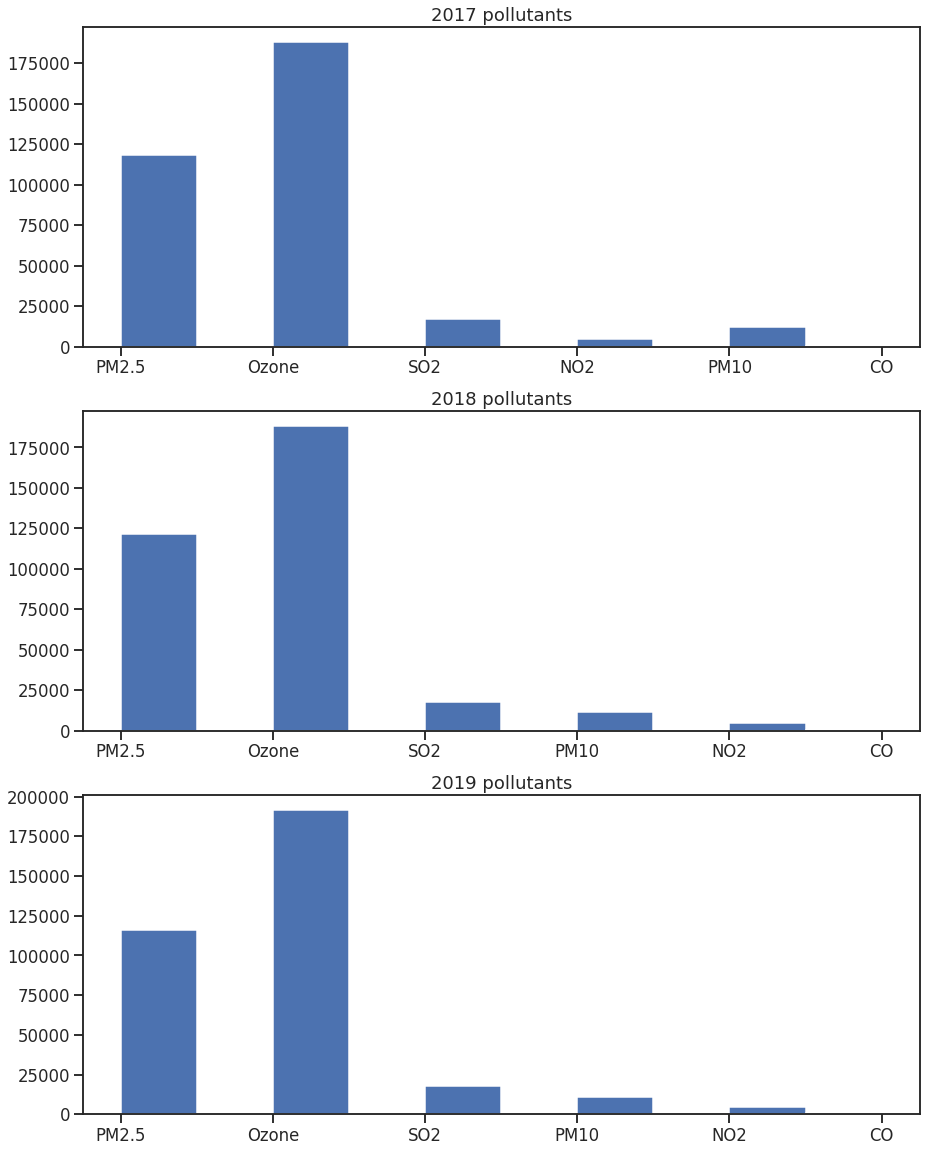

In [14]:
plt.subplots(figsize=(15,20))
plt.subplot(3, 1, 1)
plt.hist(daily_aqi_by_county_2017['Defining Parameter'])
plt.title('2017 pollutants')

plt.subplot(3, 1, 2)
plt.hist(daily_aqi_by_county_2018['Defining Parameter'])
plt.title('2018 pollutants')

plt.subplot(3, 1, 3)
plt.hist(daily_aqi_by_county_2019['Defining Parameter'])
plt.title('2019 pollutants')

plt.show()

* It appears that frequency of all pollutants from years 2017-2019 are pretty consistent
* Ozone appears most frequent recorded pollutant followed by PM2.5, SO2, and the remaining pollutants
* Because of this, other pollutants individually will be tested to see any surprising results

In [19]:
daily_aqi_by_county_2017 = get_df_with_geofips(daily_aqi_by_county_2017, 'State Code', 'County Code')
daily_aqi_by_county_2018 = get_df_with_geofips(daily_aqi_by_county_2018, 'State Code', 'County Code')
daily_aqi_by_county_2019 = get_df_with_geofips(daily_aqi_by_county_2019, 'State Code', 'County Code')


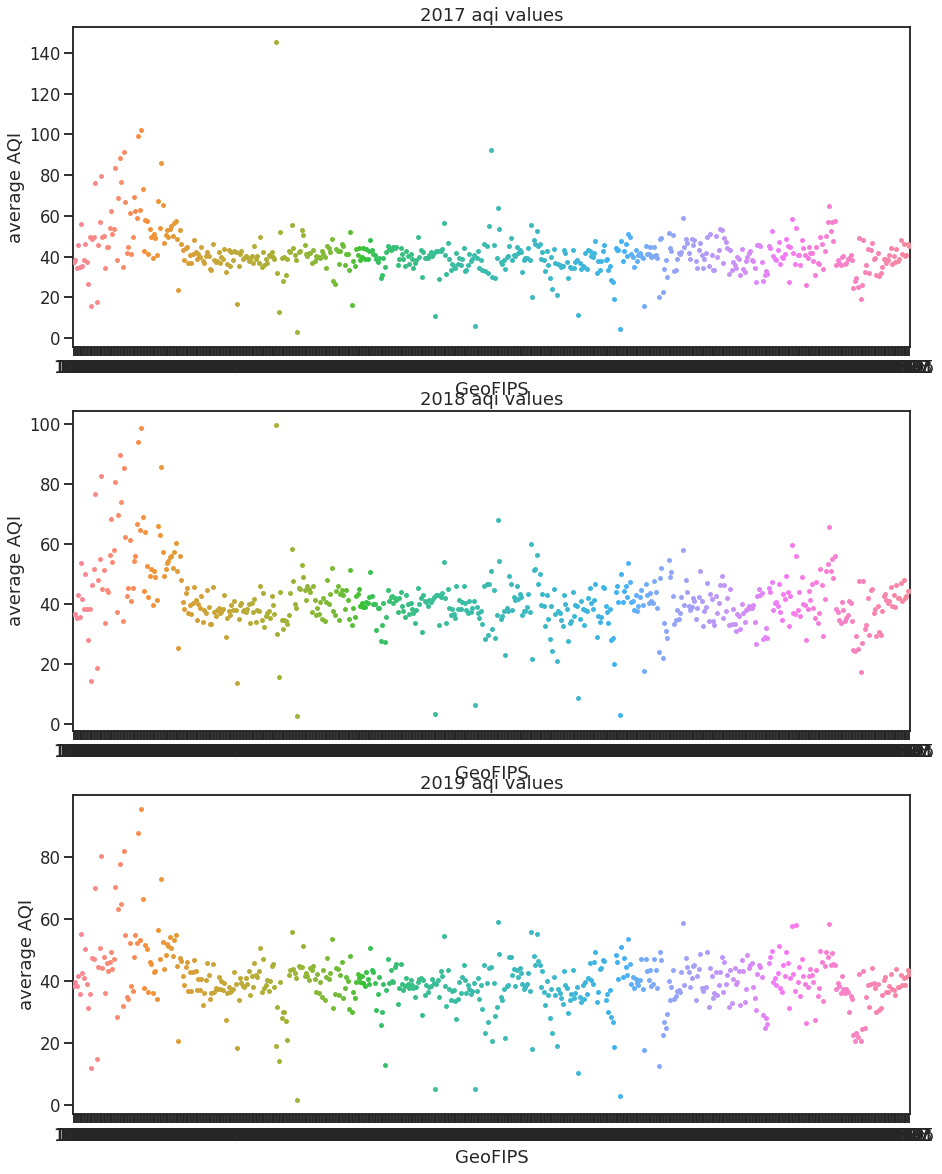

In [25]:
plt.subplots(figsize=(15,30))

plt.subplot(3, 1, 1)
sns.swarmplot(data=all_df_2017, x='GeoFIPS', y='AQI_2017')
plt.title('2017 aqi values')
plt.xlabel('GeoFIPS')
plt.ylabel('average AQI')

plt.subplot(3, 1, 2)
sns.swarmplot(data=all_df_2018, x='GeoFIPS', y='AQI_2018')
plt.title('2018 aqi values')
plt.xlabel('GeoFIPS')
plt.ylabel('average AQI')

plt.subplot(3, 1, 3)
sns.swarmplot(data=all_df_2019, x='GeoFIPS', y='AQI_2019')
plt.title('2019 aqi values')
plt.xlabel('GeoFIPS')
plt.ylabel('average AQI')

plt.show()

* appears that majority of aqi values are between (40-60)
* counties in california appear to be high
* better to show a cloropeth map to show aqi ranges

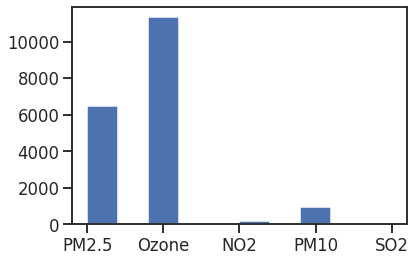

In [26]:
CA = daily_aqi_by_county_2017['State Name'] == 'California'
CA_aqi = daily_aqi_by_county_2017.loc[CA]
plt.hist(CA_aqi['Defining Parameter'])
plt.show()

* small check to validate whether states follow distribution of overall
* check california of interest because california has largest aqi values

# All us counties for all ozone avg

In [27]:
display(ozone_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(ozone_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(ozone_df_2019.corr()['AQI_2019'].sort_values().tail(15))

NHIA_FEMALE_2017          0.231131
HIAC_MALE_2017            0.234484
NHIA_MALE_2017            0.234886
HIA_MALE_2017             0.235829
HIAC_FEMALE_2017          0.235980
HIA_FEMALE_2017           0.240164
IAC_FEMALE_2017           0.251845
IAC_MALE_2017             0.252972
IA_MALE_2017              0.275875
IA_FEMALE_2017            0.277964
HIAC_MALE_ratio_2017      0.311700
HIAC_FEMALE_ratio_2017    0.313409
HIA_MALE_ratio_2017       0.314899
HIA_FEMALE_ratio_2017     0.318400
AQI_2017                  1.000000
Name: AQI_2017, dtype: float64

IAC_FEMALE_ratio_2018     0.218127
IAC_MALE_ratio_2018       0.222119
NHIAC_FEMALE_2018         0.226808
NHIAC_MALE_2018           0.231040
IAC_MALE_2018             0.232251
IAC_FEMALE_2018           0.232451
NHIA_FEMALE_2018          0.259300
NHIA_MALE_2018            0.263210
IA_MALE_2018              0.264201
IA_FEMALE_2018            0.268267
HIAC_MALE_ratio_2018      0.301166
HIAC_FEMALE_ratio_2018    0.304521
HIA_MALE_ratio_2018       0.305472
HIA_FEMALE_ratio_2018     0.311786
AQI_2018                  1.000000
Name: AQI_2018, dtype: float64

HIAC_MALE_ratio_2019      0.168836
HIAC_FEMALE_ratio_2019    0.169701
NHIA_FEMALE_2019          0.174150
NHIA_MALE_2019            0.175545
HIAC_MALE_2019            0.182172
HIAC_FEMALE_2019          0.183279
IAC_MALE_2019             0.185642
IAC_FEMALE_2019           0.186016
HIA_MALE_2019             0.188336
HIA_MALE_ratio_2019       0.188681
HIA_FEMALE_ratio_2019     0.188945
HIA_FEMALE_2019           0.191258
IA_MALE_2019              0.214389
IA_FEMALE_2019            0.215975
AQI_2019                  1.000000
Name: AQI_2019, dtype: float64

In [28]:
display(ozone_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(ozone_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(ozone_df_2019.corr()['AQI_2019'].sort_values().head(15))

EDU_TOT_ratio_2017                          -0.194283
NH_FEMALE_ratio_2017                        -0.184026
TOT_FEMALE_ratio_2017                       -0.179141
NH_MALE_ratio_2017                          -0.158303
BAC_MALE_ratio_2017                         -0.153975
BA_MALE_ratio_2017                          -0.152949
BAC_FEMALE_ratio_2017                       -0.148175
BA_FEMALE_ratio_2017                        -0.147308
NHBAC_MALE_ratio_2017                       -0.145687
NHBA_MALE_ratio_2017                        -0.145442
NHBAC_FEMALE_ratio_2017                     -0.140943
NHBA_FEMALE_ratio_2017                      -0.140846
HBA_MALE_ratio_2017                         -0.135033
HS_TOT_ratio_2017                           -0.131898
Per capita personal income (dollars) 2017   -0.129333
Name: AQI_2017, dtype: float64

EDU_TOT_ratio_2018                          -0.197581
TOT_FEMALE_ratio_2018                       -0.163956
NH_FEMALE_ratio_2018                        -0.162295
NH_MALE_ratio_2018                          -0.137574
Per capita personal income (dollars) 2018   -0.132504
HS_TOT_ratio_2018                           -0.128736
BAC_MALE_ratio_2018                         -0.128223
BA_MALE_ratio_2018                          -0.126147
NHBAC_MALE_ratio_2018                       -0.120812
BAC_FEMALE_ratio_2018                       -0.120811
NHBA_MALE_ratio_2018                        -0.119450
BA_FEMALE_ratio_2018                        -0.118951
NHAA_MALE_ratio_2018                        -0.116384
HBA_MALE_ratio_2018                         -0.116149
NHAA_FEMALE_ratio_2018                      -0.116114
Name: AQI_2018, dtype: float64

EDU_TOT_ratio_2019                          -0.172376
Per capita personal income (dollars) 2019   -0.126327
NHTOM_MALE_ratio_2019                       -0.124856
NHNAC_FEMALE_ratio_2019                     -0.122587
NHWAC_MALE_ratio_2019                       -0.121529
NHWAC_FEMALE_ratio_2019                     -0.120478
NHAAC_FEMALE_ratio_2019                     -0.120396
NHNA_FEMALE_ratio_2019                      -0.120372
NHTOM_FEMALE_ratio_2019                     -0.117595
NHAAC_MALE_ratio_2019                       -0.117537
NHNAC_MALE_ratio_2019                       -0.116585
NHWA_MALE_ratio_2019                        -0.115579
NHWA_FEMALE_ratio_2019                      -0.114816
AAC_FEMALE_ratio_2019                       -0.114454
NHAA_FEMALE_ratio_2019                      -0.114295
Name: AQI_2019, dtype: float64

In [29]:
display(ozone_df_2017.shape)
display(ozone_df_2018.shape)
display(ozone_df_2019.shape)

(498, 191)

(498, 191)

(498, 191)

## Results
Appears we see less of a relationship with county socio-economic factors
when only comparing to ozonoe pollutant.
Some common themes that show are that we see increase in education would yield
a decrease in ozone pollution and also increase per capita income of county showed
decrease in ozone levels.
Whereas it appears that the top covariant features with pollution are IA demographic and HIA, HIAC demographic.
* IA is american indian or alaska native
* HIA is hispanic, american indian and alaska native alone
* HIAC - Hispanic, American Indian and Alaska Native alone or in combination
* A drop from 584 counties to 498 counties is seen when only observing ozone aqi
### positive covariance
* range is (0.21 - 0.31)
* highest dems are HIA female ratios and IA female ratios
* also see moderate not hispanic ratios but these measures are very weak .2 and .1 measures
### negative covariance
* Very weak range is .17 - .19
* patern seen is education graduate total is largest negative r
* See BAC male ratio but all metrics have low r


# All us counties for all PM2.5 avg

In [31]:
display(pm2_5_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(pm2_5_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(pm2_5_df_2019.corr()['AQI_2019'].sort_values().tail(15))

H_FEMALE_ratio_2017                           0.255842
HWAC_FEMALE_ratio_2017                        0.260375
HWA_FEMALE_ratio_2017                         0.263328
H_MALE_ratio_2017                             0.272559
90% CI UB 0-17 percent_2017                   0.274504
HWAC_MALE_ratio_2017                          0.277101
HWA_MALE_ratio_2017                           0.280381
90% CI UB percent 5-17 percent_2017           0.280564
Poverty Percent, Age 0-17_2017                0.289689
Poverty Percent, Age 5-17 in Families_2017    0.295624
90% CI LB percent 0-17 percent_2017           0.303269
Unemployment_rate_2017                        0.305500
90% CI LB 5-17 percent_2017                   0.308288
LESS_HS_TOT_ratio_2017                        0.359875
AQI_2017                                      1.000000
Name: AQI_2017, dtype: float64

90% CI LB percent 0-17 percent_2018    0.247136
HIAC_FEMALE_ratio_2018                 0.248516
HIA_MALE_ratio_2018                    0.251887
HIAC_MALE_ratio_2018                   0.252660
HAA_MALE_ratio_2018                    0.253884
90% CI LB 5-17 percent_2018            0.257822
Unemployment_rate_2018                 0.289689
H_FEMALE_ratio_2018                    0.304873
HWAC_FEMALE_ratio_2018                 0.307452
HWA_FEMALE_ratio_2018                  0.309078
H_MALE_ratio_2018                      0.320788
HWAC_MALE_ratio_2018                   0.323817
HWA_MALE_ratio_2018                    0.325822
LESS_HS_TOT_ratio_2018                 0.361518
AQI_2018                               1.000000
Name: AQI_2018, dtype: float64

90% CI UB 0-17 percent_2019                   0.284938
90% CI UB percent 5-17 percent_2019           0.285162
Poverty Percent, Age 5-17 in Families_2019    0.303253
Poverty Percent, Age 0-17_2019                0.307555
90% CI LB 5-17 percent_2019                   0.317356
90% CI LB percent 0-17 percent_2019           0.328620
BA_FEMALE_ratio_2019                          0.369615
NHBA_FEMALE_ratio_2019                        0.370391
BAC_FEMALE_ratio_2019                         0.371851
NHBAC_FEMALE_ratio_2019                       0.373632
BA_MALE_ratio_2019                            0.378297
NHBA_MALE_ratio_2019                          0.379315
BAC_MALE_ratio_2019                           0.379930
NHBAC_MALE_ratio_2019                         0.382157
AQI_2019                                      1.000000
Name: AQI_2019, dtype: float64

In [32]:
display(pm2_5_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(pm2_5_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(pm2_5_df_2019.corr()['AQI_2019'].sort_values().head(15))

NHWAC_MALE_ratio_2017     -0.315268
NHWA_MALE_ratio_2017      -0.305379
NHWAC_FEMALE_ratio_2017   -0.300067
NHWA_FEMALE_ratio_2017    -0.290883
NH_MALE_ratio_2017        -0.285940
NH_FEMALE_ratio_2017      -0.240508
BACH_TOT_ratio_2017       -0.191993
NHIAC_MALE_ratio_2017     -0.189528
NHIAC_FEMALE_ratio_2017   -0.188030
GRAD_TOT_ratio_2017       -0.186893
NHIA_FEMALE_ratio_2017    -0.184356
NHIA_MALE_ratio_2017      -0.183624
VEHICLE_TOT_ratio_2017    -0.176906
WAC_FEMALE_ratio_2017     -0.165373
90% CI UB medh inc_2017   -0.159335
Name: AQI_2017, dtype: float64

NH_MALE_ratio_2018        -0.327039
NHWAC_MALE_ratio_2018     -0.319859
NHWA_MALE_ratio_2018      -0.313156
NHWAC_FEMALE_ratio_2018   -0.308861
NHWA_FEMALE_ratio_2018    -0.302692
NH_FEMALE_ratio_2018      -0.295639
EDU_TOT_ratio_2018        -0.206828
NHIA_FEMALE_ratio_2018    -0.184404
GeoFIPS                   -0.184012
NHIA_MALE_ratio_2018      -0.183904
NHIAC_MALE_ratio_2018     -0.182882
NHIAC_FEMALE_ratio_2018   -0.181297
VEHICLE_TOT_ratio_2018    -0.167803
BACH_TOT_ratio_2018       -0.164652
IA_FEMALE_ratio_2018      -0.145205
Name: AQI_2018, dtype: float64

NHNA_MALE_ratio_2019      -0.280108
NHNAC_MALE_ratio_2019     -0.279563
NHNA_FEMALE_ratio_2019    -0.277822
NHNAC_FEMALE_ratio_2019   -0.277473
NAC_MALE_ratio_2019       -0.275660
NA_MALE_ratio_2019        -0.275461
NAC_FEMALE_ratio_2019     -0.274111
NA_FEMALE_ratio_2019      -0.273879
TOM_MALE_ratio_2019       -0.271216
NHTOM_MALE_ratio_2019     -0.268381
TOM_FEMALE_ratio_2019     -0.260110
NHWAC_MALE_ratio_2019     -0.257452
NHTOM_FEMALE_ratio_2019   -0.254904
HNAC_FEMALE_ratio_2019    -0.251795
HNAC_MALE_ratio_2019      -0.250004
Name: AQI_2019, dtype: float64

In [30]:
display(pm2_5_df_2017.shape)
display(pm2_5_df_2018.shape)
display(pm2_5_df_2019.shape)

(408, 191)

(408, 191)

(408, 191)

## Result
Correlation appears higher for pm2.5 data

### postive covariance
We see that more that individuals that graduate with less than hs education have a moderate-weak correlation with pm2.5
pollutant. We also see some correlation with unemployment and poverty percentages; we also some HWA, H_MALE demographics.
IN 2019 data we see BA and NHBAC male demographics have moderate positive covariance. Also some HIA and HIAC are shown to have
weak positive covariance with pollution levels
* HWAC - Hispanic, White alone or in combination
* HWA - Hispanic, White alone
* H - Hispanic
* BA - Black or african american alone
* NHBAC - Not Hispanic, Black or African American alone or in combination
### negative covariance
We see common pattern that NH demographics have moderate-weak covariance with pollution levels.
We see more ethnicity features for negative covariances but some education and incoem are present.
Counties with higher vehicle ratio in population and more bachelor graduates have negative covariance.
Also some negative coveraince with median household income.

# All us counties for all SO2 avg

In [33]:
display(so2_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(so2_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(so2_df_2019.corr()['AQI_2019'].sort_values().tail(15))

HNA_FEMALE_ratio_2017      0.415692
TOM_FEMALE_ratio_2017      0.418300
NHTOM_FEMALE_ratio_2017    0.423717
HNA_MALE_ratio_2017        0.426656
NHNAC_MALE_ratio_2017      0.466956
NA_MALE_ratio_2017         0.471654
NHNA_MALE_ratio_2017       0.471794
NAC_MALE_ratio_2017        0.472599
NA_FEMALE_ratio_2017       0.476827
NHNA_FEMALE_ratio_2017     0.478494
NHNAC_FEMALE_ratio_2017    0.478929
NAC_FEMALE_ratio_2017      0.482989
HNAC_MALE_ratio_2017       0.498303
HNAC_FEMALE_ratio_2017     0.500328
AQI_2017                   1.000000
Name: AQI_2017, dtype: float64

TOM_FEMALE_ratio_2018      0.344098
NHTOM_MALE_ratio_2018      0.344756
HNA_MALE_ratio_2018        0.349979
NHTOM_FEMALE_ratio_2018    0.351024
NHNAC_MALE_ratio_2018      0.399537
NA_MALE_ratio_2018         0.402224
NHNA_MALE_ratio_2018       0.403496
NAC_MALE_ratio_2018        0.403633
NA_FEMALE_ratio_2018       0.405827
NHNA_FEMALE_ratio_2018     0.408758
NHNAC_FEMALE_ratio_2018    0.410869
NAC_FEMALE_ratio_2018      0.413733
HNAC_MALE_ratio_2018       0.421352
HNAC_FEMALE_ratio_2018     0.425133
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

WA_FEMALE_ratio_2019                   0.114013
Poverty Percent, All Ages_2019         0.133524
Poverty Percent, Age 0-17_2019         0.137413
90% CI UB percent 5-17 percent_2019    0.152788
90% CI UB percent_2019                 0.165069
90% CI UB 0-17 percent_2019            0.172780
NH_FEMALE_ratio_2019                   0.182305
HS_TOT_ratio_2019                      0.183760
NHWA_FEMALE_ratio_2019                 0.196619
NHWAC_FEMALE_ratio_2019                0.196784
NHWA_MALE_ratio_2019                   0.199221
NHWAC_MALE_ratio_2019                  0.199640
NH_MALE_ratio_2019                     0.202031
COL_OR_ASSOC_TOT_ratio_2019            0.225279
AQI_2019                               1.000000
Name: AQI_2019, dtype: float64

In [34]:
display(so2_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(so2_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(so2_df_2019.corr()['AQI_2019'].sort_values().head(15))

GRAD_TOT_ratio_2017                         -0.194520
Per capita personal income (dollars) 2017   -0.185400
90% CI Lower Bound LB medh inc_2017         -0.166237
Median Household Income_2017                -0.160996
90% CI UB medh inc_2017                     -0.155004
HWA_MALE_ratio_2017                         -0.139109
HWA_FEMALE_ratio_2017                       -0.137585
HBA_MALE_ratio_2017                         -0.137528
HBA_FEMALE_ratio_2017                       -0.136189
HBAC_MALE_ratio_2017                        -0.127452
HBAC_FEMALE_ratio_2017                      -0.127307
GRAD_TOT_2017                               -0.125240
HWAC_MALE_ratio_2017                        -0.124484
HWAC_FEMALE_ratio_2017                      -0.123349
H_MALE_ratio_2017                           -0.121412
Name: AQI_2017, dtype: float64

GRAD_TOT_ratio_2018                         -0.221922
90% CI Lower Bound LB medh inc_2018         -0.220421
Per capita personal income (dollars) 2018   -0.208086
Median Household Income_2018                -0.207285
BACH_TOT_ratio_2018                         -0.200262
90% CI UB medh inc_2018                     -0.193041
HBA_MALE_ratio_2018                         -0.146966
HBA_FEMALE_ratio_2018                       -0.143852
HBAC_MALE_ratio_2018                        -0.140402
GRAD_TOT_2018                               -0.139903
NHWA_FEMALE_2018                            -0.139455
NHWA_MALE_2018                              -0.138105
HBAC_FEMALE_ratio_2018                      -0.137930
NHWAC_FEMALE_2018                           -0.135788
NHWAC_MALE_2018                             -0.134408
Name: AQI_2018, dtype: float64

GRAD_TOT_ratio_2019                         -0.224417
90% CI Lower Bound LB medh inc_2019         -0.212022
Per capita personal income (dollars) 2019   -0.209745
Median Household Income_2019                -0.196252
H_FEMALE_ratio_2019                         -0.193796
H_MALE_ratio_2019                           -0.192737
BACH_TOT_ratio_2019                         -0.191270
HBAC_MALE_ratio_2019                        -0.188890
HBAC_FEMALE_ratio_2019                      -0.186076
HWAC_FEMALE_ratio_2019                      -0.184117
HWAC_MALE_ratio_2019                        -0.183647
HWA_FEMALE_ratio_2019                       -0.181386
HWA_MALE_ratio_2019                         -0.181042
90% CI UB medh inc_2019                     -0.179447
HBA_MALE_ratio_2019                         -0.176776
Name: AQI_2019, dtype: float64

In [35]:
display(so2_df_2017.shape)
display(so2_df_2018.shape)
display(so2_df_2019.shape)

(219, 191)

(219, 191)

(219, 191)

## Result
One of the lesser recorded pollutants, SO2, We have less observations for this measure.
We drop from 1000 counties to 219 counties.

### postive covariance
Correlation looks as the years progress the covariance drops
* we go from 0.5 to 0.2 r values
* 2017-2018 it appears hnac females has highest r values of .4 - .5
*
### negative covariance
More consistent negative covariances
* appears with more graduate totals the less AQI
* income and white ethnicity have weak covariances

# All us counties for all PM10 avg

In [36]:
display(pm10_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(pm10_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(pm10_df_2019.corr()['AQI_2019'].sort_values().tail(15))

Unemployment_rate_2017    0.429663
HAA_FEMALE_ratio_2017     0.441761
LESS_HS_TOT_ratio_2017    0.456038
HAA_MALE_ratio_2017       0.459683
HIAC_FEMALE_ratio_2017    0.499214
HIA_FEMALE_ratio_2017     0.503467
HIAC_MALE_ratio_2017      0.505687
HIA_MALE_ratio_2017       0.506966
H_FEMALE_ratio_2017       0.525979
HWA_FEMALE_ratio_2017     0.535365
HWAC_FEMALE_ratio_2017    0.535768
H_MALE_ratio_2017         0.552829
HWA_MALE_ratio_2017       0.561563
HWAC_MALE_ratio_2017      0.561756
AQI_2017                  1.000000
Name: AQI_2017, dtype: float64

Unemployment_rate_2018    0.462862
HAA_FEMALE_ratio_2018     0.466142
LESS_HS_TOT_ratio_2018    0.472371
HAA_MALE_ratio_2018       0.484867
HIA_FEMALE_ratio_2018     0.519462
HIAC_FEMALE_ratio_2018    0.521759
HIA_MALE_ratio_2018       0.522697
HIAC_MALE_ratio_2018      0.526081
H_FEMALE_ratio_2018       0.547916
HWA_FEMALE_ratio_2018     0.557753
HWAC_FEMALE_ratio_2018    0.558430
H_MALE_ratio_2018         0.573159
HWA_MALE_ratio_2018       0.582433
HWAC_MALE_ratio_2018      0.582798
AQI_2018                  1.000000
Name: AQI_2018, dtype: float64

HAA_FEMALE_ratio_2019     0.359445
HAA_MALE_ratio_2019       0.385246
HIAC_FEMALE_ratio_2019    0.391880
HIAC_MALE_ratio_2019      0.395088
HIA_FEMALE_ratio_2019     0.399759
HIA_MALE_ratio_2019       0.402144
Unemployment_rate_2019    0.415146
LESS_HS_TOT_ratio_2019    0.452503
H_FEMALE_ratio_2019       0.496121
HWAC_FEMALE_ratio_2019    0.508462
HWA_FEMALE_ratio_2019     0.509798
H_MALE_ratio_2019         0.516536
HWAC_MALE_ratio_2019      0.527989
HWA_MALE_ratio_2019       0.529591
AQI_2019                  1.000000
Name: AQI_2019, dtype: float64

In [37]:
display(pm10_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(pm10_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(pm10_df_2019.corr()['AQI_2019'].sort_values().head(15))

NH_FEMALE_ratio_2017      -0.554378
NH_MALE_ratio_2017        -0.518534
TOT_FEMALE_ratio_2017     -0.396427
NHWAC_FEMALE_ratio_2017   -0.353483
NHWA_FEMALE_ratio_2017    -0.352906
GeoFIPS                   -0.350214
NHWAC_MALE_ratio_2017     -0.335135
NHWA_MALE_ratio_2017      -0.335116
EDU_TOT_ratio_2017        -0.333440
GRAD_TOT_ratio_2017       -0.280057
BACH_TOT_ratio_2017       -0.264309
BAC_FEMALE_ratio_2017     -0.207911
NHBAC_FEMALE_ratio_2017   -0.205735
BA_FEMALE_ratio_2017      -0.204319
NHBA_FEMALE_ratio_2017    -0.201482
Name: AQI_2017, dtype: float64

NH_FEMALE_ratio_2018      -0.573108
NH_MALE_ratio_2018        -0.542114
TOT_FEMALE_ratio_2018     -0.377488
NHWA_FEMALE_ratio_2018    -0.360279
NHWAC_FEMALE_ratio_2018   -0.359591
EDU_TOT_ratio_2018        -0.354234
GeoFIPS                   -0.348185
NHWA_MALE_ratio_2018      -0.345958
NHWAC_MALE_ratio_2018     -0.344799
GRAD_TOT_ratio_2018       -0.301252
BACH_TOT_ratio_2018       -0.277498
BAC_FEMALE_ratio_2018     -0.219283
NHBAC_FEMALE_ratio_2018   -0.216678
BA_FEMALE_ratio_2018      -0.215480
BAC_MALE_ratio_2018       -0.214033
Name: AQI_2018, dtype: float64

NH_FEMALE_ratio_2019                        -0.511540
NH_MALE_ratio_2019                          -0.496329
NHWAC_FEMALE_ratio_2019                     -0.343210
NHWA_FEMALE_ratio_2019                      -0.341380
NHWAC_MALE_ratio_2019                       -0.334176
NHWA_MALE_ratio_2019                        -0.332598
EDU_TOT_ratio_2019                          -0.306762
GeoFIPS                                     -0.294129
GRAD_TOT_ratio_2019                         -0.282349
TOT_FEMALE_ratio_2019                       -0.276709
BACH_TOT_ratio_2019                         -0.231886
Per capita personal income (dollars) 2019   -0.173509
HS_TOT_ratio_2019                           -0.154046
90% CI UB medh inc_2019                     -0.131547
VEHICLE_TOT_ratio_2019                      -0.124735
Name: AQI_2019, dtype: float64

In [38]:
display(pm10_df_2017.shape)
display(pm10_df_2018.shape)
display(pm10_df_2019.shape)

(208, 191)

(208, 191)

(208, 191)

## Result
One of the lesser recorded pollutants, pm10, We have less observations for this measure.
We drop from 1000 counties to 210 counties.

### postive covariance
Correlation is consistent we get high r values of .56
* HWAC and HWA ethnicity show most consistent as top feature with highest covariance (.52 - .58)
* Unuemployment rate another features as well
* Seems like counties with high hispanic ratios have more positive covariance with pm10 pollutant
* less than high school graduate ratio appears to moderate positive covariance

### negative covariance
Consistent negative covariances
* Appears that for all 3 years counties with less Non hispanic females have lowest aqi
* income and education features have a weak-moderate negative covariance
* moderate negative covariance for graduate and bachelor attainment ratios

# All us counties for all NO2 avg

In [39]:
display(no2_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(no2_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(no2_df_2019.corr()['AQI_2019'].sort_values().tail(15))

EDU_TOT_2017                 0.394354
TOT_POP_2017                 0.394404
POP_2017                     0.394971
TOT_FEMALE_2017              0.395135
Employed_2017                0.396892
Civilian_labor_force_2017    0.396982
HS_TOT_2017                  0.407748
GRAD_TOT_2017                0.408507
NHWA_FEMALE_2017             0.422565
NHWAC_FEMALE_2017            0.423145
NHWAC_MALE_2017              0.425811
NHWA_MALE_2017               0.426013
NH_FEMALE_2017               0.431427
NH_MALE_2017                 0.433435
AQI_2017                     1.000000
Name: AQI_2017, dtype: float64

EDU_TOT_2018                 0.408292
POP_2018                     0.408420
TOT_POP_2018                 0.408809
TOT_FEMALE_2018              0.409463
Employed_2018                0.411072
Civilian_labor_force_2018    0.411187
HS_TOT_2018                  0.416985
GRAD_TOT_2018                0.425013
NHWA_FEMALE_2018             0.435530
NHWAC_FEMALE_2018            0.435999
NHWAC_MALE_2018              0.438278
NHWA_MALE_2018               0.438599
NH_FEMALE_2018               0.444173
NH_MALE_2018                 0.446061
AQI_2018                     1.000000
Name: AQI_2018, dtype: float64

Civilian_labor_force_2019    0.399503
90% CI UB 5-17 fam_2019      0.399567
BA_MALE_2019                 0.399956
90% CI UB 0-17_2019          0.401224
BAC_FEMALE_2019              0.403832
GRAD_TOT_2019                0.408540
NHWA_FEMALE_2019             0.410240
NHWAC_FEMALE_2019            0.410781
BAC_MALE_2019                0.411612
NHWAC_MALE_2019              0.413149
NHWA_MALE_2019               0.413403
HS_TOT_2019                  0.415612
NH_FEMALE_2019               0.435556
NH_MALE_2019                 0.435718
AQI_2019                     1.000000
Name: AQI_2019, dtype: float64

In [40]:
display(no2_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(no2_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(no2_df_2019.corr()['AQI_2019'].sort_values().head(15))

NHWAC_FEMALE_ratio_2017       -0.396887
NHWAC_MALE_ratio_2017         -0.393131
NHWA_FEMALE_ratio_2017        -0.390643
NHWA_MALE_ratio_2017          -0.386321
COL_OR_ASSOC_TOT_ratio_2017   -0.311397
WAC_FEMALE_ratio_2017         -0.308605
WAC_MALE_ratio_2017           -0.297186
WA_FEMALE_ratio_2017          -0.296385
WA_MALE_ratio_2017            -0.284882
NH_MALE_ratio_2017            -0.271551
VEHICLE_TOT_ratio_2017        -0.239548
NH_FEMALE_ratio_2017          -0.238281
HS_TOT_ratio_2017             -0.174256
GeoFIPS                       -0.167340
TOT_MALE_ratio_2017           -0.097265
Name: AQI_2017, dtype: float64

NHWAC_FEMALE_ratio_2018       -0.422334
NHWA_FEMALE_ratio_2018        -0.418202
NHWAC_MALE_ratio_2018         -0.418043
NHWA_MALE_ratio_2018          -0.413489
NH_MALE_ratio_2018            -0.306189
WAC_FEMALE_ratio_2018         -0.304807
WA_FEMALE_ratio_2018          -0.297141
COL_OR_ASSOC_TOT_ratio_2018   -0.290293
WAC_MALE_ratio_2018           -0.290048
WA_MALE_ratio_2018            -0.282481
NH_FEMALE_ratio_2018          -0.276320
VEHICLE_TOT_ratio_2018        -0.235113
GeoFIPS                       -0.192972
HS_TOT_ratio_2018             -0.170346
NHIAC_MALE_ratio_2018         -0.081854
Name: AQI_2018, dtype: float64

NHWAC_FEMALE_ratio_2019       -0.417537
NHWAC_MALE_ratio_2019         -0.414900
NHWA_FEMALE_ratio_2019        -0.411372
NHWA_MALE_ratio_2019          -0.408146
COL_OR_ASSOC_TOT_ratio_2019   -0.351636
WAC_FEMALE_ratio_2019         -0.350772
WAC_MALE_ratio_2019           -0.339086
WA_FEMALE_ratio_2019          -0.337383
WA_MALE_ratio_2019            -0.325600
NH_MALE_ratio_2019            -0.263902
VEHICLE_TOT_ratio_2019        -0.241396
NH_FEMALE_ratio_2019          -0.227578
GeoFIPS                       -0.164587
HS_TOT_ratio_2019             -0.140898
NHIAC_MALE_ratio_2019         -0.112020
Name: AQI_2019, dtype: float64

In [41]:
display(no2_df_2017.shape)
display(no2_df_2018.shape)
display(no2_df_2019.shape)

(180, 191)

(180, 191)

(180, 191)

## Result
One of the lesser recorded pollutants, no2, We have less observations for this measure.
We drop from 1000 counties to 180 counties.

### postive covariance
Correlation is consistent we get r values around .4
* For this metric is opposite from other pollutants
* postive covariance appear for non hispanic demographcis
* also positive with number of high school graduates
* positive for number of employed individuals and number of civilian labor force
* 2019 does show one attribute of BA demograph (.39 r values)

### negative covariance
Consistent negative covariances
* Appears that for all 3 years counties with less Non hispanic females have lowest aqi
* income and education features have a weak-moderate negative covariance

# All us counties for all CO avg

In [42]:
display(co_df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(co_df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(co_df_2019.corr()['AQI_2019'].sort_values().tail(15))

VEHICLE_TOT_2017         0.333203
COL_OR_ASSOC_TOT_2017    0.335617
NHWA_FEMALE_2017         0.336876
NHWAC_FEMALE_2017        0.342664
GRAD_TOT_2017            0.346949
NHWA_MALE_2017           0.347774
BACH_TOT_2017            0.350767
NHWAC_MALE_2017          0.352818
NHTOM_MALE_2017          0.354049
NH_FEMALE_2017           0.354382
TOM_MALE_2017            0.355408
TOM_FEMALE_2017          0.358646
NHTOM_FEMALE_2017        0.359058
NH_MALE_2017             0.364061
AQI_2017                 1.000000
Name: AQI_2017, dtype: float64

HAA_FEMALE_ratio_2018      0.375899
NHAAC_FEMALE_ratio_2018    0.376347
NHTOM_MALE_2018            0.377453
NHAAC_MALE_ratio_2018      0.377484
TOM_MALE_2018              0.377982
AAC_FEMALE_ratio_2018      0.378883
AAC_MALE_ratio_2018        0.380111
NH_MALE_2018               0.381136
TOM_FEMALE_2018            0.382606
NHTOM_FEMALE_2018          0.383754
NHAA_FEMALE_ratio_2018     0.390242
NHAA_MALE_ratio_2018       0.393390
AA_FEMALE_ratio_2018       0.394668
AA_MALE_ratio_2018         0.398134
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

POP_2019                                       0.343159
TOT_FEMALE_2019                                0.343402
EDU_TOT_2019                                   0.345006
Civilian_labor_force_2019                      0.346009
Employed_2019                                  0.346890
Personal income (thousands of dollars) 2019    0.362523
BACH_TOT_2019                                  0.374409
NHWA_FEMALE_2019                               0.383362
NHWAC_FEMALE_2019                              0.385280
NHWA_MALE_2019                                 0.385694
NHWAC_MALE_2019                                0.386944
GRAD_TOT_2019                                  0.394305
NH_FEMALE_2019                                 0.401112
NH_MALE_2019                                   0.403447
AQI_2019                                       1.000000
Name: AQI_2019, dtype: float64

In [43]:
display(co_df_2017.corr()['AQI_2017'].sort_values().head(15))
display(co_df_2018.corr()['AQI_2018'].sort_values().head(15))
display(co_df_2019.corr()['AQI_2019'].sort_values().head(15))

NHWA_FEMALE_ratio_2017        -0.449012
NHWAC_FEMALE_ratio_2017       -0.443305
NHWA_MALE_ratio_2017          -0.439776
NHWAC_MALE_ratio_2017         -0.433305
HS_TOT_ratio_2017             -0.377014
WA_FEMALE_ratio_2017          -0.320339
WAC_FEMALE_ratio_2017         -0.312631
NH_MALE_ratio_2017            -0.310288
GeoFIPS                       -0.304757
WA_MALE_ratio_2017            -0.292861
NH_FEMALE_ratio_2017          -0.285729
WAC_MALE_ratio_2017           -0.282624
COL_OR_ASSOC_TOT_ratio_2017   -0.192158
NHIA_MALE_ratio_2017          -0.188117
NHIA_FEMALE_ratio_2017        -0.171811
Name: AQI_2017, dtype: float64

NHWA_FEMALE_ratio_2018        -0.451267
NHWA_MALE_ratio_2018          -0.449041
NHWAC_FEMALE_ratio_2018       -0.442798
NHWAC_MALE_ratio_2018         -0.439968
GeoFIPS                       -0.356460
WA_FEMALE_ratio_2018          -0.339070
HS_TOT_ratio_2018             -0.327045
WAC_FEMALE_ratio_2018         -0.325671
WA_MALE_ratio_2018            -0.319106
NH_MALE_ratio_2018            -0.307714
WAC_MALE_ratio_2018           -0.303809
NH_FEMALE_ratio_2018          -0.280571
COL_OR_ASSOC_TOT_ratio_2018   -0.237469
NHIA_MALE_ratio_2018          -0.180107
NHIA_FEMALE_ratio_2018        -0.162079
Name: AQI_2018, dtype: float64

NHWA_MALE_ratio_2019          -0.424638
NHWAC_MALE_ratio_2019         -0.422365
NHWA_FEMALE_ratio_2019        -0.420789
NHWAC_FEMALE_ratio_2019       -0.418290
WA_FEMALE_ratio_2019          -0.356751
WAC_FEMALE_ratio_2019         -0.356231
WA_MALE_ratio_2019            -0.347432
WAC_MALE_ratio_2019           -0.346246
GeoFIPS                       -0.323973
HS_TOT_ratio_2019             -0.323230
NH_MALE_ratio_2019            -0.256045
COL_OR_ASSOC_TOT_ratio_2019   -0.212850
NH_FEMALE_ratio_2019          -0.209807
NHIA_MALE_ratio_2019          -0.190608
NHIA_FEMALE_ratio_2019        -0.172111
Name: AQI_2019, dtype: float64

In [44]:
display(co_df_2017.shape)
display(co_df_2018.shape)
display(co_df_2019.shape)

(141, 191)

(141, 191)

(141, 191)

## Result
 Least recorded pollutants, co, We have less observations for this measure.
We drop from 1000 counties to 141 counties.

### postive covariance
Correlation is consistent we get r values around .39
* moderate r for non hispanic demographic
* 2018 shows shows moderate r for african american populations
* more jumbled features some education total, labor force, and vehicle totals are weak_moderate relationship

### negative covariance
Consistent negative covariances and r values around -45
* larger negative covariances
* all point to non hispanic and white ratios in counties
* also moderate r for white ethnicities and
* also moderate weak for high school attainment ratio